# Pretrained GAN Models

Pretrained GAN models are GAN architectures that have been trained on large datasets and are available for use in various applications. These models can generate high-quality images without the need to train a GAN from scratch, which requires significant computational resources and time. Below are some popular pretrained GAN models and information on how to use them.

## Popular Pretrained GAN Models

### 1. BigGAN

**BigGAN** is known for generating high-fidelity images at high resolutions. It was introduced by DeepMind and trained on the ImageNet dataset.

- **Features**:
  - High-resolution image generation (e.g., 256x256, 512x512)
  - Class-conditional generation (can generate images of specified classes)
  - High quality and diversity of generated images

- **How to Use**:
  - BigGAN is available through the `torchvision` library in PyTorch.
  - Pretrained models can be downloaded and used for inference.

### Example Code:
```python
import torch
from torchvision.transforms import ToPILImage
from pytorch_pretrained_biggan import BigGAN, truncated_noise_sample, one_hot_from_int

# Load pretrained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')

# Prepare input vectors
truncation = 0.4
class_vector = one_hot_from_int([207, 944, 393], batch_size=3)  # Class indices for 'tabby cat', 'soap bubble', 'goldfish'
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=3)

# Convert to PyTorch tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# Move to GPU if available
if torch.cuda.is_available():
    noise_vector = noise_vector.to('cuda')
    class_vector = class_vector.to('cuda')
    model.to('cuda')

# Generate images
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# Convert to PIL image and display
to_pil = ToPILImage()
images = [to_pil(img.cpu()) for img in output]
for img in images:
    img.show()


2. **StyleGAN**
- StyleGAN is another powerful GAN model developed by NVIDIA, known for generating high-quality images with a controllable style. It introduces style-based architecture and noise injection at different layers to achieve high-quality results.

**Features**

Style mixing and control
High-resolution image generation
State-of-the-art results in face generation
How to Use:

StyleGAN and StyleGAN2 models are available through various implementations on GitHub.
Pretrained models can be found in repositories such as NVIDIA's official StyleGAN repository.
```python
import dnnlib
import dnnlib.tflib as tflib
import pretrained_networks

# Initialize TensorFlow
tflib.init_tf()

# Load pretrained StyleGAN model
url = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'
_G, _D, Gs = pretrained_networks.load_networks(url)

# Generate images
latents = np.random.randn(1, Gs.input_shape[1])
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

# Display image
import PIL.Image
PIL.Image.fromarray(images[0], 'RGB').show()
```




3. **GANimation**
- GANimation is a GAN model designed for animating faces. It can generate facial expressions based on action unit (AU) values.

**Features**

Real-time facial animation
Generates facial expressions based on AU values
Suitable for applications in animation and AR
How to Use:

GANimation pretrained models are available on GitHub.
Pretrained weights can be downloaded and used for facial animation tasks.

```python
import torch
from ganimation.models import load_model
from ganimation.transforms import ToTensor, Normalize

# Load pretrained GANimation model
gen, disc = load_model('path/to/pretrained/model.pth', device='cuda')

# Prepare input image and action units
image = Image.open('path/to/face_image.jpg')
action_units = torch.tensor([[0.0, 1.0, 0.5, ...]])  # Example AU values

# Preprocess image
transform = ToTensor()
image = transform(image).unsqueeze(0)
image = Normalize()(image)

# Move to GPU if available
if torch.cuda.is_available():
    image = image.to('cuda')
    action_units = action_units.to('cuda')
    gen.to('cuda')

# Generate animated image
with torch.no_grad():
    animated_image = gen(image, action_units)

# Convert to PIL image and display
animated_image = animated_image.squeeze(0).cpu().numpy()
animated_image = (animated_image * 255).astype(np.uint8).transpose(1, 2, 0)
PIL.Image.fromarray(animated_image).show()
```

## Where to Find Pretrained GAN Models

### PyTorch Hub
A repository of pretrained models available for easy loading and inference in PyTorch.
- [PyTorch Hub](https://pytorch.org/hub/)

### TensorFlow Hub
A repository of pretrained models available for TensorFlow.
- [TensorFlow Hub](https://www.tensorflow.org/hub)

### GitHub
Many research groups and companies publish their pretrained GAN models on GitHub.
- [BigGAN on GitHub](https://github.com/ajbrock/BigGAN-PyTorch)
- [StyleGAN on GitHub](https://github.com/NVlabs/stylegan)


## Table of Contents

### 1. Face Generation with PGANs
> #### 1.1 Install pytorch_GAN_zoo library
> #### 1.2 Load pretrained the model
> #### 1.3 Generate random images
### 2. Natural Image Synthesis with BigGANs
> #### 2.1 Install pytorch-pretrained-BigGAN library
> #### 2.2 Load pretrained the model
> #### 2.3 Generate random images

---

### 1. Face Generation with PGANs

#### 1.1 Install pytorch_GAN_zoo library

In [ ]:
!git clone https://github.com/facebookresearch/pytorch_GAN_zoo.git

Cloning into 'pytorch_GAN_zoo'...
remote: Enumerating objects: 1523, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1523 (delta 17), reused 21 (delta 13), pack-reused 1495
Receiving objects: 100% (1523/1523), 2.06 MiB | 30.14 MiB/s, done.
Resolving deltas: 100% (977/977), done.


In [ ]:
%cd /content/pytorch_GAN_zoo

/content/pytorch_GAN_zoo


In [ ]:
# install dependencies
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 676 kB 28.9 MB/s 
     |████████████████████████████████| 420 kB 60.8 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 249 kB 67.7 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=e1ca89709bab01618adbf2e2dc7a1fed1ffa85465df8d9a1429386d9b044b348
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=403444b0482365a67da384d12253991d12c2da74b3a931e2cd1bd301a55c5e9d
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=fc0616bd597e5eb18cca44d58469b85844

#### 1.2 Load pretrained model

In [ ]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=True)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/zipball/hub" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth


  0%|          | 0.00/264M [00:00<?, ?B/s]

Average network found !


#### 1.3 Generate random images

In [ ]:
num_images = 10
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

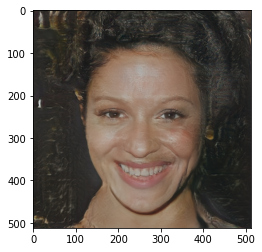

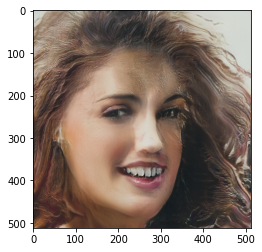

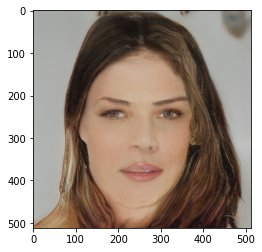

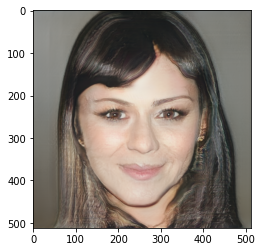

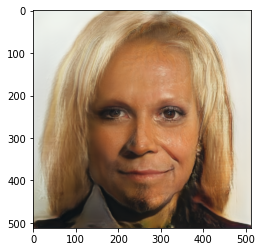

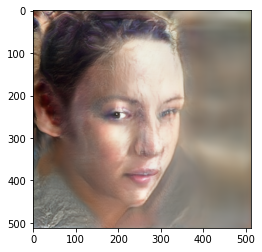

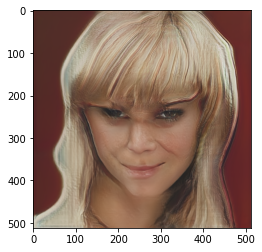

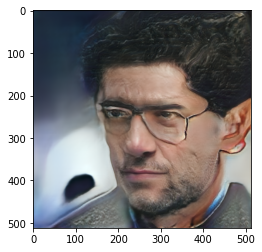

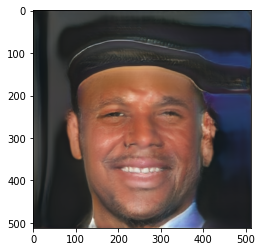

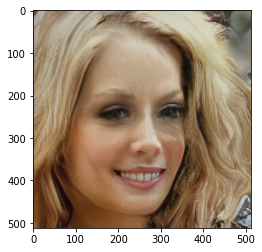

In [ ]:
for image in generated_images:
    image -= image.min()
    image /= image.max()
    plt.imshow(np.transpose(image, (1, 2, 0)))
    plt.show()

### 2. Natural Image Synthesis with BigGANs

BigGAN is an advanced GAN architecture designed to generate high-resolution, high-fidelity images. It was introduced by researchers at DeepMind and represents a significant improvement over previous GAN models in terms of image quality and diversity. BigGANs are known for their ability to generate images that are very close to real photographs in terms of visual quality.

#### 2.1 Install pytorch-pretrained-BigGAN library

In [ ]:
!pip install pytorch-pretrained-biggan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 13.0 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 9.0 MB 48.7 MB/s 
     |████████████████████████████████| 139 kB 72.2 MB/s 
     |████████████████████████████████| 127 kB 70.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


#### 2.2 Load pretrained model

In [ ]:
import nltk
nltk.download('all')


from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('biggan-deep-256')

In [ ]:
# Prepare a input
truncation = 0.4
class_vector = one_hot_from_names(['tabby cat', 'soap bubble', 'goldfish'], batch_size=3)
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=3)

# All in tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# If you have a GPU, put everything on cuda
noise_vector = noise_vector.to('cuda')
class_vector = class_vector.to('cuda')
model.to('cuda');

In [ ]:
# Prepare the truncation value which controls the trade-off between diversity and quality of the generated images
# Lower truncation values will produce higher quality but less diverse images, while higher values will increase diversity at the cost of quality
truncation = 0.4

# Create a one-hot encoded class vector for the specified class labels
# The function one_hot_from_names converts class names into one-hot encoded vectors that represent these classes in the model's label space
# Here, we generate class vectors for 'tabby cat', 'soap bubble', and 'goldfish'
class_vector = one_hot_from_names(['tabby cat', 'soap bubble', 'goldfish'], batch_size=3)

# Generate a noise vector for the input to the generator
# The function truncated_noise_sample generates noise vectors sampled from a truncated normal distribution
# This noise is used as part of the input to the generator to produce different images
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=3)

# Convert the numpy array noise vector to a PyTorch tensor
# PyTorch tensors are the primary data structure used for modeling and training in PyTorch
noise_vector = torch.from_numpy(noise_vector)

# Convert the numpy array class vector to a PyTorch tensor
class_vector = torch.from_numpy(class_vector)

# Check if a GPU is available and move the noise vector to the GPU for faster computation
# CUDA (Compute Unified Device Architecture) is a parallel computing platform that allows for faster computation on NVIDIA GPUs
if torch.cuda.is_available():
    noise_vector = noise_vector.to('cuda')

# Check if a GPU is available and move the class vector to the GPU for faster computation
if torch.cuda.is_available():
    class_vector = class_vector.to('cuda')

# Move the model to the GPU if a GPU is available
# This ensures that all computations involving the model are carried out on the GPU, which significantly speeds up training and inference
if torch.cuda.is_available():
    model.to('cuda')


#### 2.3 Generate random images

In [ ]:
# Generate an image
with torch.no_grad():
    generated_images = model(noise_vector, class_vector, truncation)

# If you have a GPU put back on CPU
generated_images = generated_images.to('cpu')

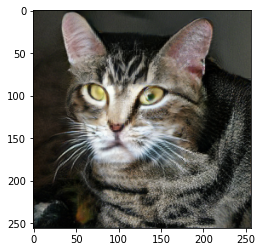

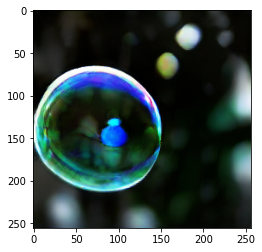

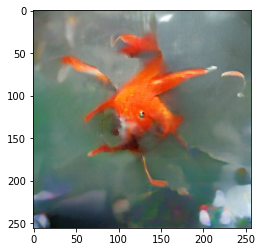

In [ ]:
for image in generated_images:
    image -= image.min()
    image /= image.max()
    plt.imshow(np.transpose(image, (1, 2, 0)))
    plt.show()